# Moment Problems in Probability

- Really cool applied math problem : can you construct a probability distribution from its moments / cumulants?
- Would such a construction be unique? What kind of associated issues can you run into with such a construction

# Naive Approach : Fourier Transform

- Take the cumulants, construct the characteristic function from the cumulants
- Fourier transform the characteristic function to get the probability distribution.

In [44]:
using QuadGK
using Integrals

In [45]:
using LinearAlgebra
using Plots
using FFTW

In [46]:
cums = [0.0, 100, 1000.0, 0.0];

In [47]:
function characteristic_function(x; cumz=cums)
    s = 0. + 0.0im
    for (n, cum) in enumerate(cumz)
        if (n < 20)
            s += cum * ((x*1.0im)^n) / factorial(n)
        else
            # Use stirling's approximation if n > 20
            s += cum * ((x*1.0im)^n) / (n^n * exp(n))
        end
    end
    return exp(s)
end

characteristic_function (generic function with 1 method)

In [48]:
characteristic_function(0.02)

0.9801978020191747 - 0.0013069311771700598im

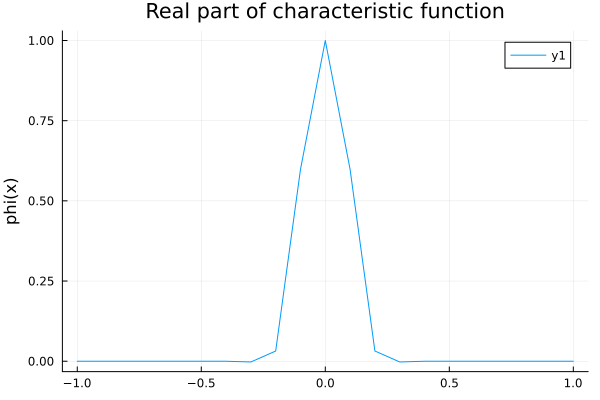

In [49]:
t = -1:0.1:1
plot(t, real.(characteristic_function.(t)), title="Real part of characteristic function", ylabel="phi(x)")

In [50]:
y = -200:0.01:200
ϕ = characteristic_function.(y)
F = fftshift(fft(ϕ)); # Fourier transform of characteristic function gives us the distribution

In [51]:
function P(x)
    i = argmin(abs.(y .- x))
    return abs(real(F[i]))
end

P (generic function with 1 method)

In [52]:
#norm, _ = quadgk(P, -Inf, Inf)

In [53]:
function prob(x)
    return P(x)
end

prob (generic function with 1 method)

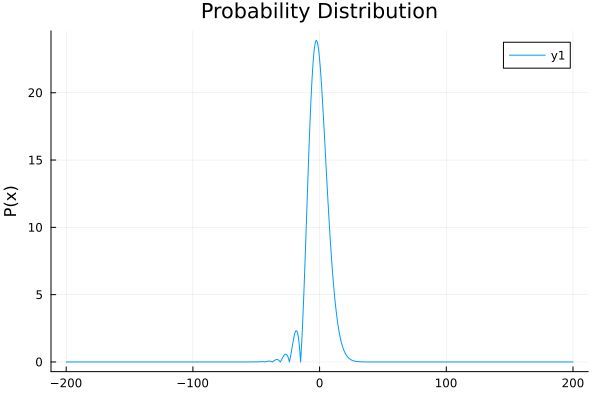

In [54]:
plot(y, prob, title="Probability Distribution", ylabel="P(x)")

In [ ]:
#sol.u

In [ ]:
# Smoothing via moving averages, doesn't work

binsize = 150

K = abs.(real.(prob))

mov = []
xaxis = []
for i in 1:(length(enumerate(K))-binsize)
    sum = 0
    for j in 1:binsize
        sum += K[i+j-1]
    end
    push!(mov, sum/binsize)
    push!(xaxis, x[i])
end

In [ ]:
plot(xaxis, mov, title="Probability Distribution Smoothed")

Reading
1. Classical Moment Problem, Akhiezer
2. 
